In [1]:
from tiny_ml_code.plotting import Plotting
from tiny_ml_code.keras_to_pico import Converter
import os

c:\Users\hansa\Kod\Tiny ML Aurora Detector\env\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [4]:
# Needs to be changed if running in Colab
PROJECT_ROOT = "C:/Users/hansa/Kod/Tiny ML Aurora Detector"
print("Project root directory:", PROJECT_ROOT)

Project root directory: C:/Users/hansa/Kod/Tiny ML Aurora Detector


In [8]:

def process_experiment(tiny_ml_path, original_meta_data_path, weights_path, data_for_digitalization, fpr_threshold=1e-4, tiny_ml_model_name="tiny_ml_classifier", show_plots=False, quantizing="int8"):

	"""
	Process a single experiment: convert model, quantize, test, plot, and save.

	Parameters
	----------
	tiny_ml_path : str
		Path where tiny_ml model files will be stored.
	original_meta_data_path : str
		Path to the original meta_data.json file.
	weights_path : str
		Path to the trained model weights (.h5).
	data_for_digitalization : str
		Path to the dataset used for conversion.
	fpr_threshold : float, optional
		False positive rate threshold for evaluation, by default 1e-4
	tiny_ml_model_name : str, optional
		Name of the tiny_ml model, by default "tiny_ml_classifier"
	show_plots : bool, optional
		Whether to display plots, by default False
	quantizing : str, optional
		Quantization type for TFLite model, by default "int8"
	"""

	# Initialize converter
	converter = Converter(
		original_meta_data_path=original_meta_data_path,
		data_path=data_for_digitalization,
		tiny_ml_path=tiny_ml_path,
		tiny_ml_model_name=tiny_ml_model_name
	)

	# Plotting object
	plotting = Plotting(
		meta_data_path=None,
		meta_data=converter.meta_data_tiny_ml,
		show_plots=show_plots
	)

	# Convert and quantize
	tflite_model_quant = converter.get_converted_model(weights_path=weights_path, quantize=quantizing)

	# Save TFLite model
	tiny_ml_model_file = os.path.join(tiny_ml_path, tiny_ml_model_name + ".tflite")
	with open(tiny_ml_model_file, "wb") as f:
		f.write(tflite_model_quant)

	# Produce C header
	converter.produce_h_file(tflite_model_quant)

	# Test model
	interpreter_quant = converter.get_interpreter(tflite_model_quant)
	test_y_pred, test_y_true, val_y_pred, val_y_true = converter.test_lite_model(interpreter=interpreter_quant, quantized_model=quantizing)

	# Metrics
	metrics = converter.get_metrics(test_y_pred, test_y_true, val_y_pred, val_y_true, fpr_threshold=fpr_threshold)
	cut_threshold = metrics['cut_threshold']
	if cut_threshold == 'infinity':
		cut_threshold = 1.0

	# Plot
	plotting.plot_confusion_matrix(
		y_pred=test_y_pred, y_true=test_y_true,
		fpr_threshold=fpr_threshold, cut_threshold=cut_threshold,
		normalize=True
	)
	plotting.plot_roc_curve(
		fpr_threshold=fpr_threshold,
		y_pred=test_y_pred, y_true=test_y_true,
		x_scale='linear'
	)

	# Save tiny_ml meta data
	converter.meta_data_tiny_ml.save_dict()

	return metrics


Could not load predictions or true labels during initialization: [Errno 2] No such file or directory: 'C:\\Users\\hansa\\Kod\\Tiny ML Aurora Detector\\experiments/tiny_ml_classifier_experiment_11\\reconstructed_examples.npy'


Model: "encoder_classifier_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ encoder_5 (Encoder)             │ ?                      │           298 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classifier_2 (Classifier)       │ ?                      │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 331 (1.29 KB)

 Trainable params: 331 (1.29 KB)

 Non-trainable params: 0 (0.00 B)

INFO:tensorflow:Assets written to: C:\Users\hansa\AppData\Local\Temp\tmppa7yjxoi\assets


INFO:tensorflow:Assets written to: C:\Users\hansa\AppData\Local\Temp\tmppa7yjxoi\assets


Saved artifact at 'C:\Users\hansa\AppData\Local\Temp\tmppa7yjxoi'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 8), dtype=tf.float32, name=None)
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  2216927816848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2216978377104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2216978377680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2216978377872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2216978372880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2216978377488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2216978369616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2216978374800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2216978380944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2216978376720: TensorSpec(shape=(), dtype=tf.resource, name=None)


c:\Users\hansa\Kod\Tiny ML Aurora Detector\env\Lib\site-packages\tensorflow\lite\python\convert.py:863: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(


Written C:\Users\hansa\Kod\Tiny ML Aurora Detector\experiments/tiny_ml_classifier_experiment_11\tiny_ml_classifier.h, length = 4936 bytes


c:\Users\hansa\Kod\Tiny ML Aurora Detector\env\Lib\site-packages\tensorflow\lite\python\interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


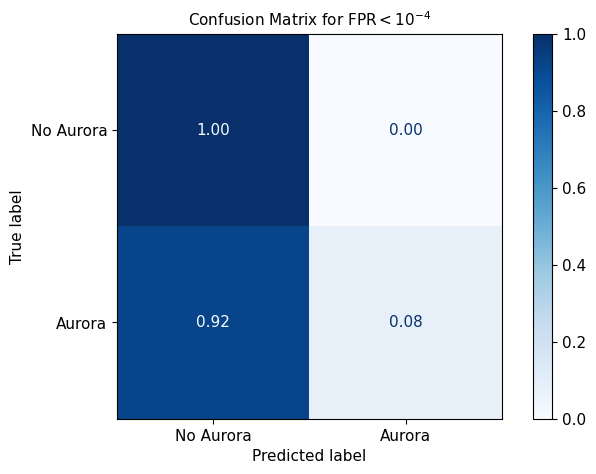

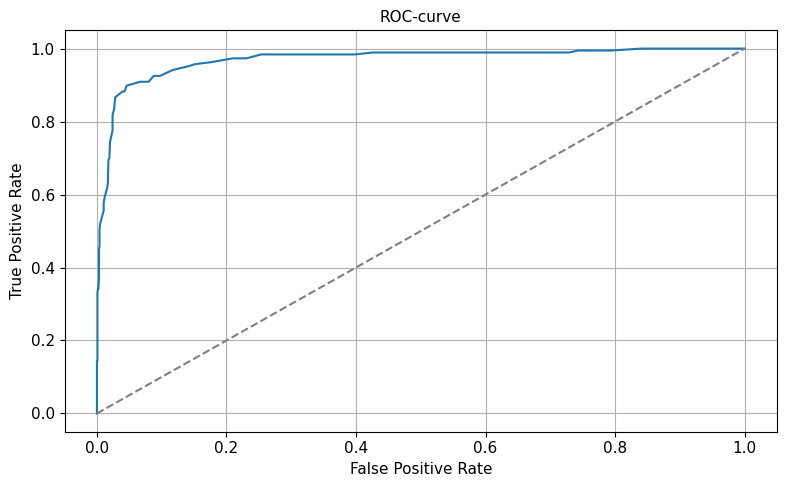

{'fpr_threshold': 0.0001, 'tpr_at_fpr': 0.08021390374331551, 'cut_threshold': 19.53216552734375, 'precision': 1.0, 'recall': 0.08021390374331551, 'f1_score': 0.1485148514851485, 'roc_auc': 0.9697723182377914, 'confusion_matrix': [[1.0, 0.0], [0.9197860962566845, 0.08021390374331551]]}


In [9]:
# Single use
# Parameters
PROJECT_ROOT = r"C:\Users\hansa\Kod\Tiny ML Aurora Detector"
data_for_digitalization = os.path.join(PROJECT_ROOT, "data/processed/subset_labeled.npz")

tiny_ml_path = os.path.join(PROJECT_ROOT, "experiments/tiny_ml_classifier_experiment_11")
original_meta_data_path = os.path.join(PROJECT_ROOT, "experiments/classifier_experiment_11/meta_data.json")
weights_path = os.path.join(PROJECT_ROOT, "experiments/classifier_experiment_11/model_final.weights.h5")

metrics = process_experiment(
	tiny_ml_path=tiny_ml_path,
	original_meta_data_path=original_meta_data_path,
	weights_path=weights_path,
	data_for_digitalization=data_for_digitalization,
	show_plots=True
	)

print(metrics)


In [7]:
# Multi use
# Parameters

PROJECT_ROOT = r"C:\Users\hansa\Kod\Tiny ML Aurora Detector"
data_for_digitalization = os.path.join(PROJECT_ROOT, "data/processed/subset_labeled.npz")
show_plots = False
fpr_threshold = 1e-4

experiment_numbers = [1, 2, 3, 11, 12]
all_metrics = {}

for nr in experiment_numbers:
	tiny_ml_path = os.path.join(PROJECT_ROOT, f"experiments/tiny_ml_classifier_experiment_{nr}")
	original_meta_data_path = os.path.join(PROJECT_ROOT, f"experiments/classifier_experiment_{nr}/meta_data.json")
	weights_path = os.path.join(PROJECT_ROOT, f"experiments/classifier_experiment_{nr}/model_final.weights.h5")

	metrics = process_experiment(
		tiny_ml_path=tiny_ml_path,
		original_meta_data_path=original_meta_data_path,
		weights_path=weights_path,
		data_for_digitalization=data_for_digitalization,
		show_plots=False
		)
	all_metrics[nr] = metrics



Processing experiment 1...
Could not load predictions or true labels during initialization: [Errno 2] No such file or directory: 'C:\\Users\\hansa\\Kod\\Tiny ML Aurora Detector\\experiments/tiny_ml_classifier_experiment_1\\reconstructed_examples.npy'


Model: "encoder_classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ encoder_1 (Encoder)             │ ?                      │           298 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classifier (Classifier)         │ ?                      │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 331 (1.29 KB)

 Trainable params: 331 (1.29 KB)

 Non-trainable params: 0 (0.00 B)

INFO:tensorflow:Assets written to: C:\Users\hansa\AppData\Local\Temp\tmpwvxlrpj2\assets


INFO:tensorflow:Assets written to: C:\Users\hansa\AppData\Local\Temp\tmpwvxlrpj2\assets


Saved artifact at 'C:\Users\hansa\AppData\Local\Temp\tmpwvxlrpj2'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 8), dtype=tf.float32, name=None)
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  2216953579856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2216953585040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2216953584848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2216953579664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2216953585616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2216953585808: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2216953586576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2216953584272: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2216953586768: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2216953584080: TensorSpec(shape=(), dtype=tf.resource, name=None)


c:\Users\hansa\Kod\Tiny ML Aurora Detector\env\Lib\site-packages\tensorflow\lite\python\convert.py:863: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(


Written C:\Users\hansa\Kod\Tiny ML Aurora Detector\experiments/tiny_ml_classifier_experiment_1\tiny_ml_classifier.h, length = 4912 bytes


c:\Users\hansa\Kod\Tiny ML Aurora Detector\env\Lib\site-packages\tensorflow\lite\python\interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)



Processing experiment 11...
Could not load predictions or true labels during initialization: [Errno 2] No such file or directory: 'C:\\Users\\hansa\\Kod\\Tiny ML Aurora Detector\\experiments/tiny_ml_classifier_experiment_11\\reconstructed_examples.npy'


Model: "encoder_classifier_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ encoder_3 (Encoder)             │ ?                      │           298 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classifier_1 (Classifier)       │ ?                      │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 331 (1.29 KB)

 Trainable params: 331 (1.29 KB)

 Non-trainable params: 0 (0.00 B)

INFO:tensorflow:Assets written to: C:\Users\hansa\AppData\Local\Temp\tmptzl_j83k\assets


INFO:tensorflow:Assets written to: C:\Users\hansa\AppData\Local\Temp\tmptzl_j83k\assets


Saved artifact at 'C:\Users\hansa\AppData\Local\Temp\tmptzl_j83k'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 8), dtype=tf.float32, name=None)
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  2216953593680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2216978371728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2216978372688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2216978372496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2216978373072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2216978372112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2216978373456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2216978371920: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2216978373840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2216978369040: TensorSpec(shape=(), dtype=tf.resource, name=None)


c:\Users\hansa\Kod\Tiny ML Aurora Detector\env\Lib\site-packages\tensorflow\lite\python\convert.py:863: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(


Written C:\Users\hansa\Kod\Tiny ML Aurora Detector\experiments/tiny_ml_classifier_experiment_11\tiny_ml_classifier.h, length = 4936 bytes


c:\Users\hansa\Kod\Tiny ML Aurora Detector\env\Lib\site-packages\tensorflow\lite\python\interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)
